In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.svm import SVC
# Load the Excel data
data = pd.read_excel('corected data2.xlsx')
data.head(10)

,Crop,Avg. Temp (°C),Avg. Rainfall,Avg. Soil pH,Avg. Humidity,Avg. Sunlight (hours),Wind,Soil Type
0,Maize,22.5,55,6.40,55,7,Moderate,Loam
1,Sorghum,27.5,50,6.15,50,7,Moderate,Sandy loam
2,Wheat,17.5,55,6.75,55,9,Low,Loam
3,Beans,24.0,60,6.50,60,7,Low,Sandy loam
4,Peas,18.5,50,6.75,55,7,Calm,Loam
5,Potatoes,20.0,60,5.75,65,7,Moderate,Sandy loam
6,Cabbage,17.5,55,6.50,65,7,Low,Loam
7,Tomatoes,22.5,70,6.40,55,8,Low,Sandy loam
8,Onions,19.0,55,6.50,55,7,Moderate,Sandy loam
9,Carrots,20.0,43,6.50,55,7,Low,Sandy loam


In [2]:

# Check for missing values and encode categorical variables
label_encoder = LabelEncoder()
data['Wind_encoded'] = label_encoder.fit_transform(data['Wind'])
data['Soil Type_encoded'] = label_encoder.fit_transform(data['Soil Type'])
data['crop_encoded'] = label_encoder.fit_transform(data['Crop'])

# Prepare features and target variable
X = data.drop(columns=['Wind', 'Soil Type', 'Crop', 'crop_encoded'])
y = data['crop_encoded']


In [3]:
# Data Augmentation: Noise Injection
def add_noise(X, noise_level=0.1):
    noisy_data = X.copy()
    noise = np.random.normal(0, noise_level, noisy_data.shape)
    noisy_data += noise
    return noisy_data

# Augment the dataset with noise
X_noisy = add_noise(X)
X_augmented = np.vstack((X, X_noisy))
y_augmented = np.hstack((y, y))



In [4]:
# Optional: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_augmented, y_augmented)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Train and evaluate Random Forest Classifier
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


Training Random Forest Classifier...


RandomForestClassifier(random_state=42)

In [5]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")

# Optional: Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.42

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         1
           7       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         2
          14       1.00      1.00      1.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         2
          20       1.00      1.00      1.00         1
          21       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         0

    accuracy    

/root/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/root/anaconda3/lib/python3.12/site-packag

In [6]:
# Train and evaluate Support Vector Classifier (SVC)
print("Training Support Vector Classifier...")
svc_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels, e.g., 'rbf', 'poly'
svc_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc_model.predict(X_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc:.2f}")

# Optional: Print classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred_svc))


Training Support Vector Classifier...
SVC Accuracy: 0.67


In [7]:
import pandas as pd
from faker import Faker

fake = Faker()

# Define the columns and their data types
columns = ["Crop", "Avg. Temp (°C)", "Avg. Rainfall", "Avg. Soil pH", "Avg. Humidity", "Avg. Sunlight (hours)", "Wind", "Soil Type"]

# Define the number of new rows to generate
num_rows = 200

# Generate the new data
new_data = []
for _ in range(num_rows):
    crop = fake.random_element(elements=("Maize", "Sorghum", "Wheat", "Beans", "Peas", "Potatoes", "Cabbage", "Tomatoes", "Onions", "Carrots", "Barley", "Oats", "Rice", "Corn"))
    avg_temp = round(fake.random_int(min=15, max=30, step=1), 1)
    avg_rainfall = fake.random_int(min=40, max=80, step=1)
    avg_soil_pH = round(fake.random_int(min=6, max=7, step=1) + fake.random_int(min=0, max=9, step=1) / 10, 2)
    avg_humidity = fake.random_int(min=50, max=70, step=1)
    avg_sunlight = fake.random_int(min=6, max=9, step=1)
    wind = fake.random_element(elements=("Low", "Moderate", "High"))
    soil_type = fake.random_element(elements=("Loam", "Sandy loam", "Clay"))
    
    new_data.append([crop, avg_temp, avg_rainfall, avg_soil_pH, avg_humidity, avg_sunlight, wind, soil_type])

# Create a new pandas DataFrame with the generated data
new_df = pd.DataFrame(new_data, columns=columns)


In [8]:
new_df.tail()

,Crop,Avg. Temp (°C),Avg. Rainfall,Avg. Soil pH,Avg. Humidity,Avg. Sunlight (hours),Wind,Soil Type
195,Corn,30,73,7.5,59,9,Low,Sandy loam
196,Carrots,19,52,6.8,51,6,High,Loam
197,Oats,24,41,7.8,54,6,Moderate,Sandy loam
198,Rice,26,50,7.4,54,8,High,Sandy loam
199,Rice,15,58,6.8,70,6,High,Loam


In [9]:
new_df.tail()

,Crop,Avg. Temp (°C),Avg. Rainfall,Avg. Soil pH,Avg. Humidity,Avg. Sunlight (hours),Wind,Soil Type
195,Corn,30,73,7.5,59,9,Low,Sandy loam
196,Carrots,19,52,6.8,51,6,High,Loam
197,Oats,24,41,7.8,54,6,Moderate,Sandy loam
198,Rice,26,50,7.4,54,8,High,Sandy loam
199,Rice,15,58,6.8,70,6,High,Loam


In [51]:
data = pd.read_excel('corected data2.xlsx')
df_concat = pd.concat([new_df, data])
df_concat.to_csv("newCrops.csv",index=False)
len(df_concat)

228

In [18]:
df_concat.head()

,Crop,Avg. Temp (°C),Avg. Rainfall,Avg. Soil pH,Avg. Humidity,Avg. Sunlight (hours),Wind,Soil Type
0,Onions,18.0,63,6.0,52,7,High,Sandy loam
1,Wheat,25.0,50,6.2,69,7,High,Loam
2,Corn,16.0,67,6.1,69,7,Moderate,Loam
3,Beans,21.0,78,7.2,56,7,Low,Sandy loam
4,Rice,27.0,67,6.3,50,6,Moderate,Clay


In [36]:

# Check for missing values and encode categorical variables
label_encoder = LabelEncoder()
df_concat['Wind_encoded'] = label_encoder.fit_transform(df_concat['Wind'])
df_concat['Soil Type_encoded'] = label_encoder.fit_transform(df_concat['Soil Type'])
df_concat['crop_encoded'] = label_encoder.fit_transform(df_concat['Crop'])

# Prepare features and target variable
X = df_concat.drop(columns=['Wind', 'Soil Type', 'Crop', 'crop_encoded'])
y = df_concat['crop_encoded']

,Avg. Temp (°C),Avg. Rainfall,Avg. Soil pH,Avg. Humidity,Avg. Sunlight (hours),Wind_encoded,Soil Type_encoded
0,18.0,63,6.0,52,7,1,2
1,25.0,50,6.2,69,7,1,1
2,16.0,67,6.1,69,7,3,1
3,21.0,78,7.2,56,7,2,2
4,27.0,67,6.3,50,6,3,0


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate Random Forest Classifier
print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


Training Random Forest Classifier...


RandomForestClassifier(random_state=42)

In [35]:
# Train and evaluate Support Vector Classifier (SVC)
print("Training Support Vector Classifier...")
svc_model = SVC(kernel='linear', random_state=42)  # You can choose different kernels, e.g., 'rbf', 'poly'
svc_model.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc_model.predict(X_test)

# Calculate accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc:.2f}")


Training Support Vector Classifier...
SVC Accuracy: 0.02


   Avg. Temp (°C)  Avg. Rainfall  Avg. Soil pH  Avg. Humidity  \
0            18.0             63           6.0             52   
1            25.0             50           6.2             69   
2            16.0             67           6.1             69   
3            21.0             78           7.2             56   
4            27.0             67           6.3             50   

   Avg. Sunlight (hours)  Wind_encoded  Soil Type_encoded  crop_encoded  
0                      7             1                  2            17  
1                      7             1                  1            31  
2                      7             3                  1             7  
3                      7             2                  2             2  
4                      6             3                  0            24  


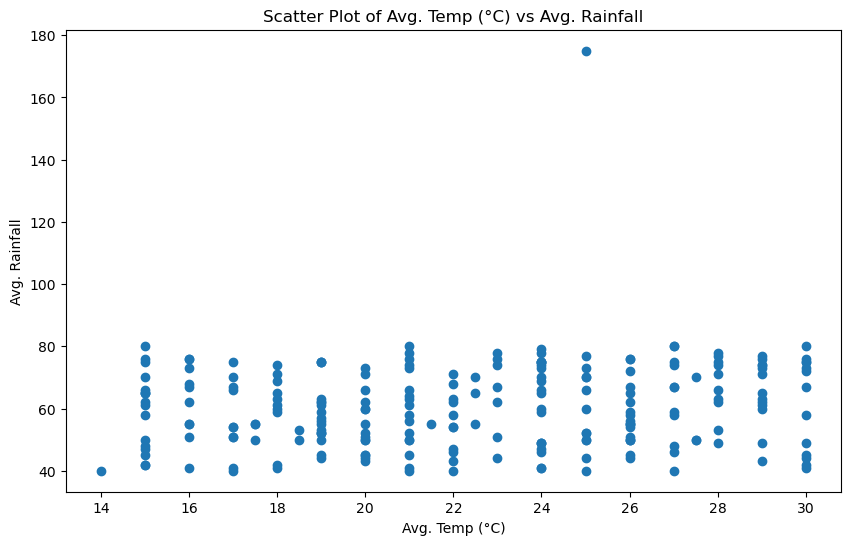

In [47]:
import matplotlib.pyplot as plt
import pandas as pd


# Plot the data
# data["Avg. Temp (°C)"], data["Avg. Rainfall"]
df = pd.concat([X,y],axis=1)
print(df.head())
plt.figure(figsize=(10, 6))
plt.scatter(df["Avg. Temp (°C)"],df["Avg. Rainfall"])
plt.xlabel("Avg. Temp (°C)")
plt.ylabel("Avg. Rainfall")
plt.title("Scatter Plot of Avg. Temp (°C) vs Avg. Rainfall")
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}

# Initialize the model
model = RandomForestClassifier()

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/root/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.043478260869565216


In [52]:
data = pd.read_csv("newCrops.csv")

,Crop,Avg. Temp (°C),Avg. Rainfall,Avg. Soil pH,Avg. Humidity,Avg. Sunlight (hours),Wind,Soil Type
0,Onions,18.0,63,6.0,52,7,High,Sandy loam
1,Wheat,25.0,50,6.2,69,7,High,Loam
2,Corn,16.0,67,6.1,69,7,Moderate,Loam
3,Beans,21.0,78,7.2,56,7,Low,Sandy loam
4,Rice,27.0,67,6.3,50,6,Moderate,Clay


In [58]:
# Function to augment data with Gaussian noise
def augment_data_with_gaussian_noise(df, num_augmented_samples=5):
    augmented_data = []
    for _ in range(num_augmented_samples):
        # Sample a random row
        sample = df.sample(n=1, replace=True).values[0]
        # Generate Gaussian noise: mean = 0, stddev = 0.1 (adjust as needed)
        noise = np.random.normal(0, 0.1, sample[:-1].shape)  # Exclude the target variable
        # Create augmented sample
        augmented_sample = sample[:-1] + noise
        # Append the target variable back to the augmented sample
        augmented_data.append(np.append(augmented_sample, sample[-1]))  
    return pd.DataFrame(augmented_data, columns=df.columns)

# Augment the data
augmented_df = augment_data_with_gaussian_noise(df, num_augmented_samples=10)  # Adjust the number of samples as needed

# Combine the original and augmented data
combined_df = pd.concat([df, augmented_df], ignore_index=True)

In [60]:
combined_df.shape

(238, 8)

In [61]:
# Check for missing values and encode categorical variables
label_encoder = LabelEncoder()
df_concat['Wind_encoded'] = label_encoder.fit_transform(df_concat['Wind'])
df_concat['Soil Type_encoded'] = label_encoder.fit_transform(df_concat['Soil Type'])
df_concat['crop_encoded'] = label_encoder.fit_transform(df_concat['Crop'])

# Prepare features and target variable
X = df_concat.drop(columns=['Wind', 'Soil Type', 'Crop', 'crop_encoded'])
y = df_concat['crop_encoded']

In [71]:
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [77]:
# Create and train the SVC model
model = SVC()
model.fit(X_train, y_train)



SVC()

In [78]:
from sklearn.metrics import accuracy_score
# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.043478260869565216


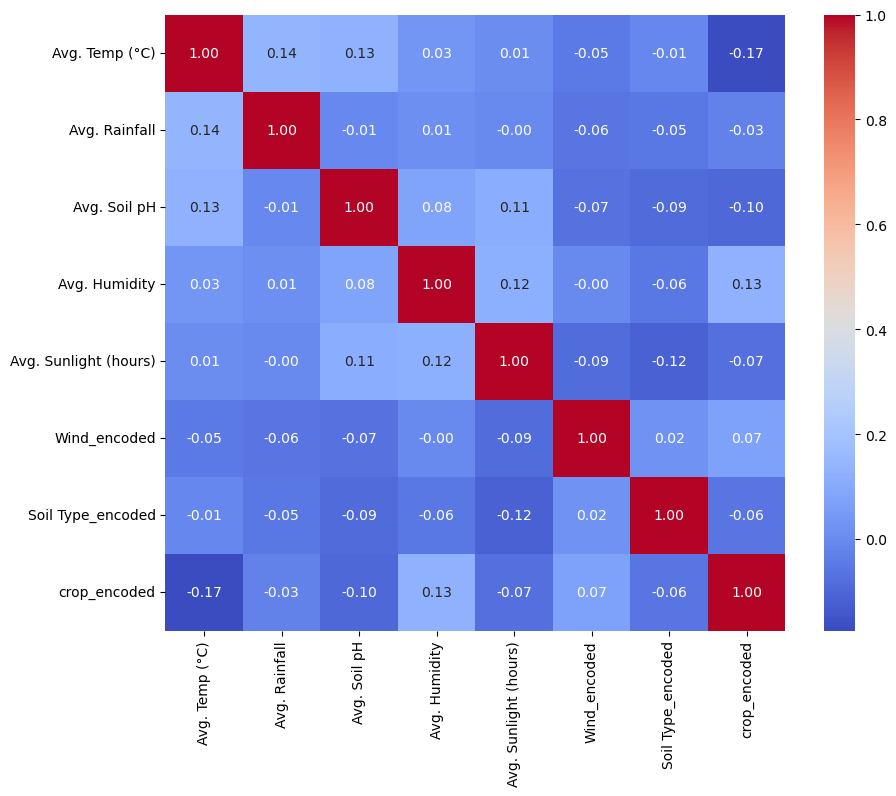

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(combined_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()
